# Task 5: Learning Crowd Dynamics

In [1]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
from utils import *
from sklearn.decomposition import PCA

### Task 5.1 - Create a delay embedding with 350 delays of the first three measurement areas

In [2]:
# Load data and ignore burn-in period
data = np.loadtxt("../../data/MI_timesteps.txt", dtype=int)[1000:]

# Creating an embedding for many windows will take some time
delays = 350
embedding = create_delay_embedding(data, delays, 0, 3, data.shape[0] - delays - 1)

# Perform PCA
pca = PCA(n_components=3)
embedding_pca = pca.fit_transform(embedding)

### Task 5.2 - Create 9 plots - one for each measurement area

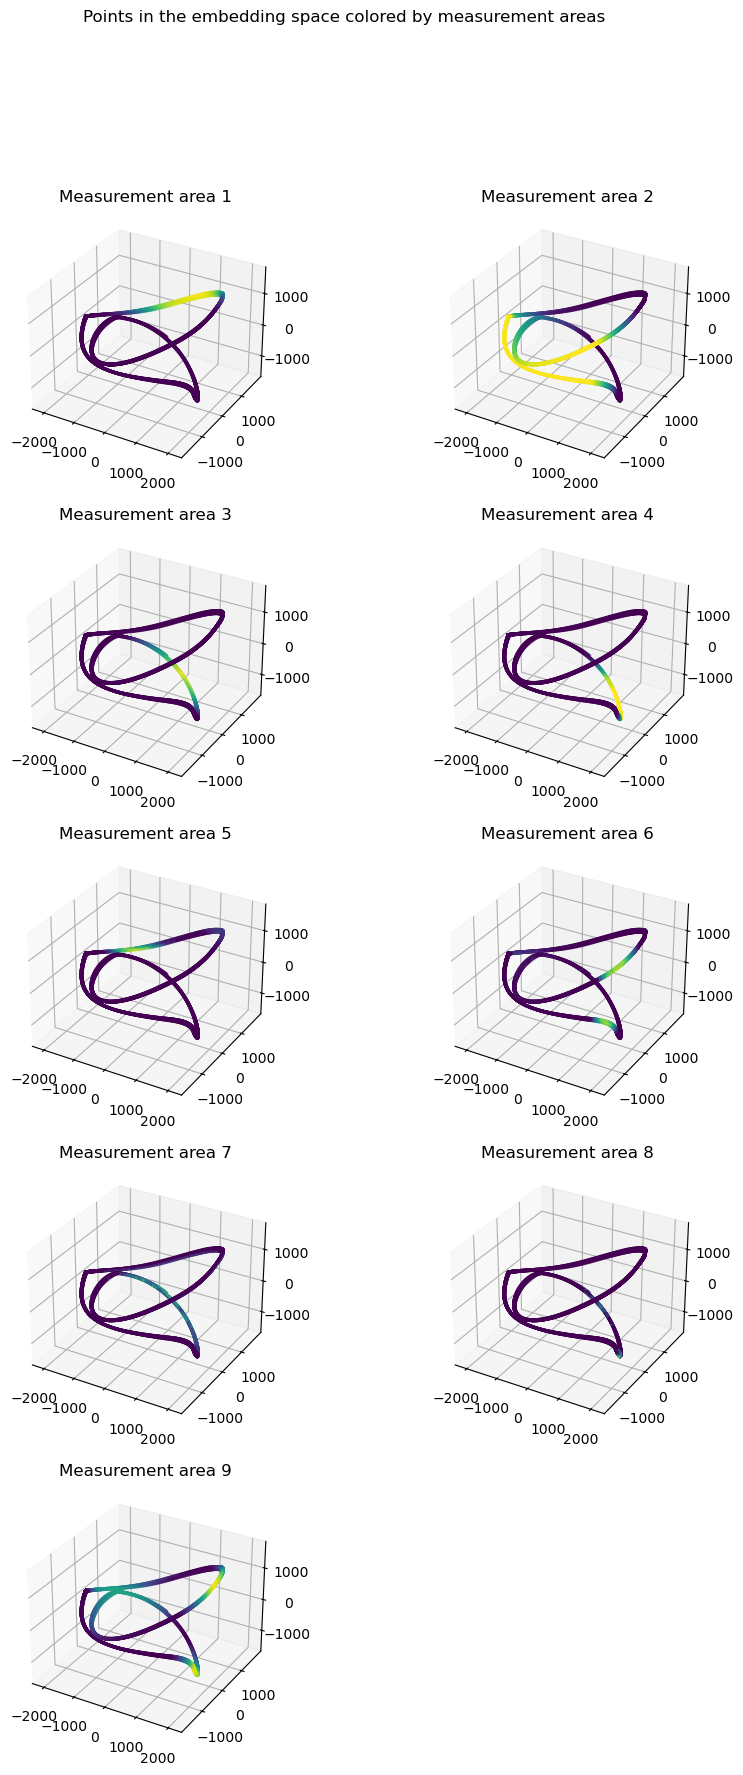

In [3]:
color_points(embedding_pca, data, 0)

### Task 5.3 - Learn the dynamics on the periodic curve you embedded in the principal components.

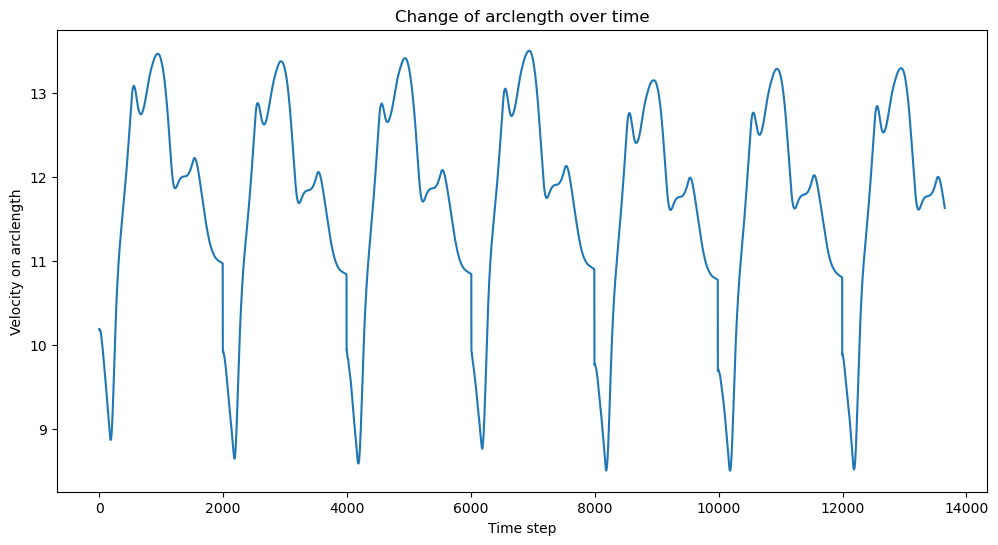

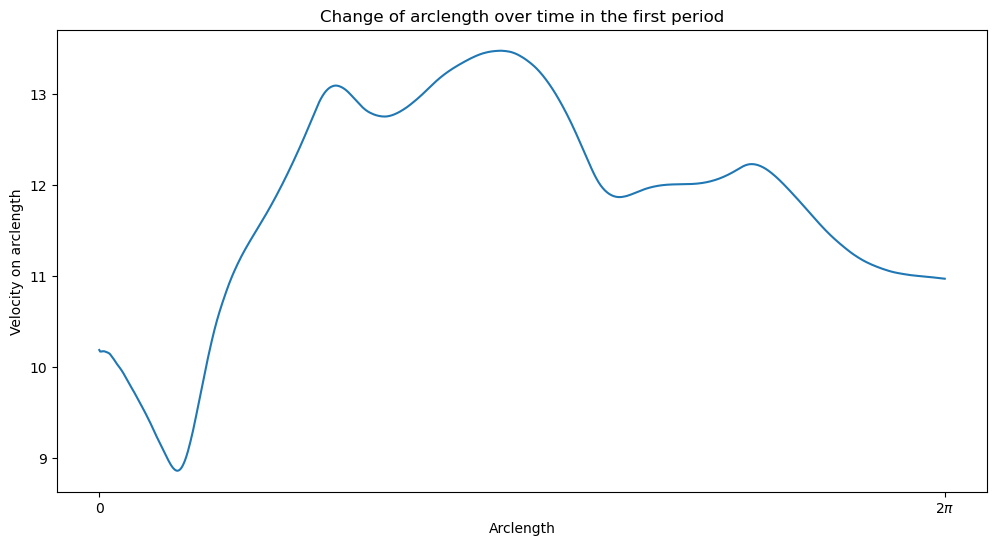

In [4]:
# Determine the end of each period. The period length was empirically approximated to be around 2000 time steps.
period_ends = [0]
for i in [2000, 4000, 6000, 8000, 10000, 12000]:
    period_ends.append(i - 50 + np.argmin(np.linalg.norm(embedding_pca[i - 50:i + 50] - embedding_pca[0], axis=1)))

# Calculate velocities
vels = calculate_arclenght_velocities(embedding_pca, period_ends)

# Plot the velocities
plot_arclength_velocity(vels, period_ends[1])

### Task 5.4 Prediction of utilization of the MI building 

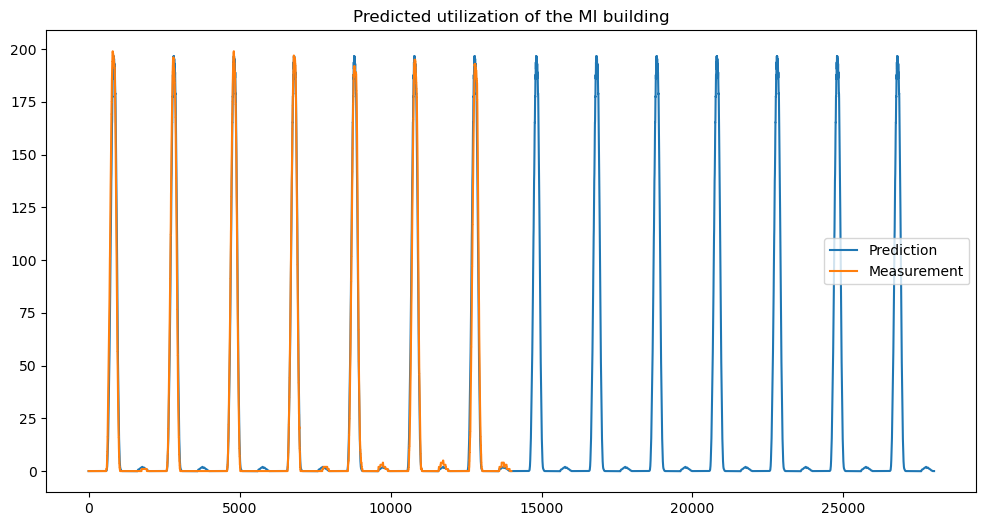

In [5]:
# Only keep first period
vels = vels[:period_ends[1]]
arclength = np.linspace(0, 2 * np.pi, len(vels))
arclength_over_time = np.stack((arclength, np.array(vels))).T

# Calculate coefficients with velocity
y_hat, coef = pred_nonlinear(arclength_over_time, np.linspace(0, 2 * np.pi, 2000).reshape(-1, 1), 5)

pred_future(data, embedding_pca, period_ends[1], coef)